#### Import the libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from train_evaluate_AutoencoderCNN import plot_reconstructions, generate_reconstruction_dict
from Autoencoder import Autoencoder
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [2]:
%matplotlib inline

#### Set proper device based on cuda availability 

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

#### Implement a convolutional autoencoder for MNIST dataset.

In [4]:
%run -i train_evaluate_AutoencoderCNN.py --mode=conv --learning_rate=1.0 --num_epochs=10 --batch-size=10 --log_dir=logs

Torch device selected:  cpu
conv
Network in conv
Total parameters is =  74497
Encoder parameters is =  18816.0
Decoder parameters is =  55681.0
Train set: Average loss: 0.4975


Test set: Average loss: 0.4840

Model Saved
Train set: Average loss: 0.4763


Test set: Average loss: 0.4816

Model Saved
Train set: Average loss: 0.4739


Test set: Average loss: 0.4795

Model Saved
Train set: Average loss: 0.4727


Test set: Average loss: 0.4785

Model Saved
Train set: Average loss: 0.4719


Test set: Average loss: 0.4777

Model Saved
Train set: Average loss: 0.4714


Test set: Average loss: 0.4775

Model Saved
Train set: Average loss: 0.4709


Test set: Average loss: 0.4771

Model Saved
Train set: Average loss: 0.4706


Test set: Average loss: 0.4769

Model Saved
Train set: Average loss: 0.4703


Test set: Average loss: 0.4771

Model Saved
Train set: Average loss: 0.4700


Test set: Average loss: 0.4761

Model Saved
Training and evaluation finished


#### Calculating the Average Loss

In [5]:
file = torch.load('./best_weights/conv_best.pth')
print('Average Loss ',file['best_loss'])

Average Loss  0.47607351556420324


#### Initialize the model 

In [6]:
model_conv = Autoencoder(FLAGS.mode).to(device)

conv


#### Load the trained model

In [7]:
model_conv.load_state_dict(file['state_dict'])

<All keys matched successfully>

#### Reconstructs the new test loader with batch_size = 1 from testing data and collects Test data (2 image for each class)

In [8]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset2 = datasets.MNIST('./data/', train=False, transform=transform)  
reconstruction_test_loader = DataLoader(dataset2, batch_size = 1, shuffle=True, num_workers=1)

In [9]:
datadict = generate_reconstruction_dict(reconstruction_test_loader)

#### Define loss function

In [10]:
criterion = nn.MSELoss()

#### Reconstruction loss calculated using the criterion and Plotting it in 10x4 subplots with the original ones

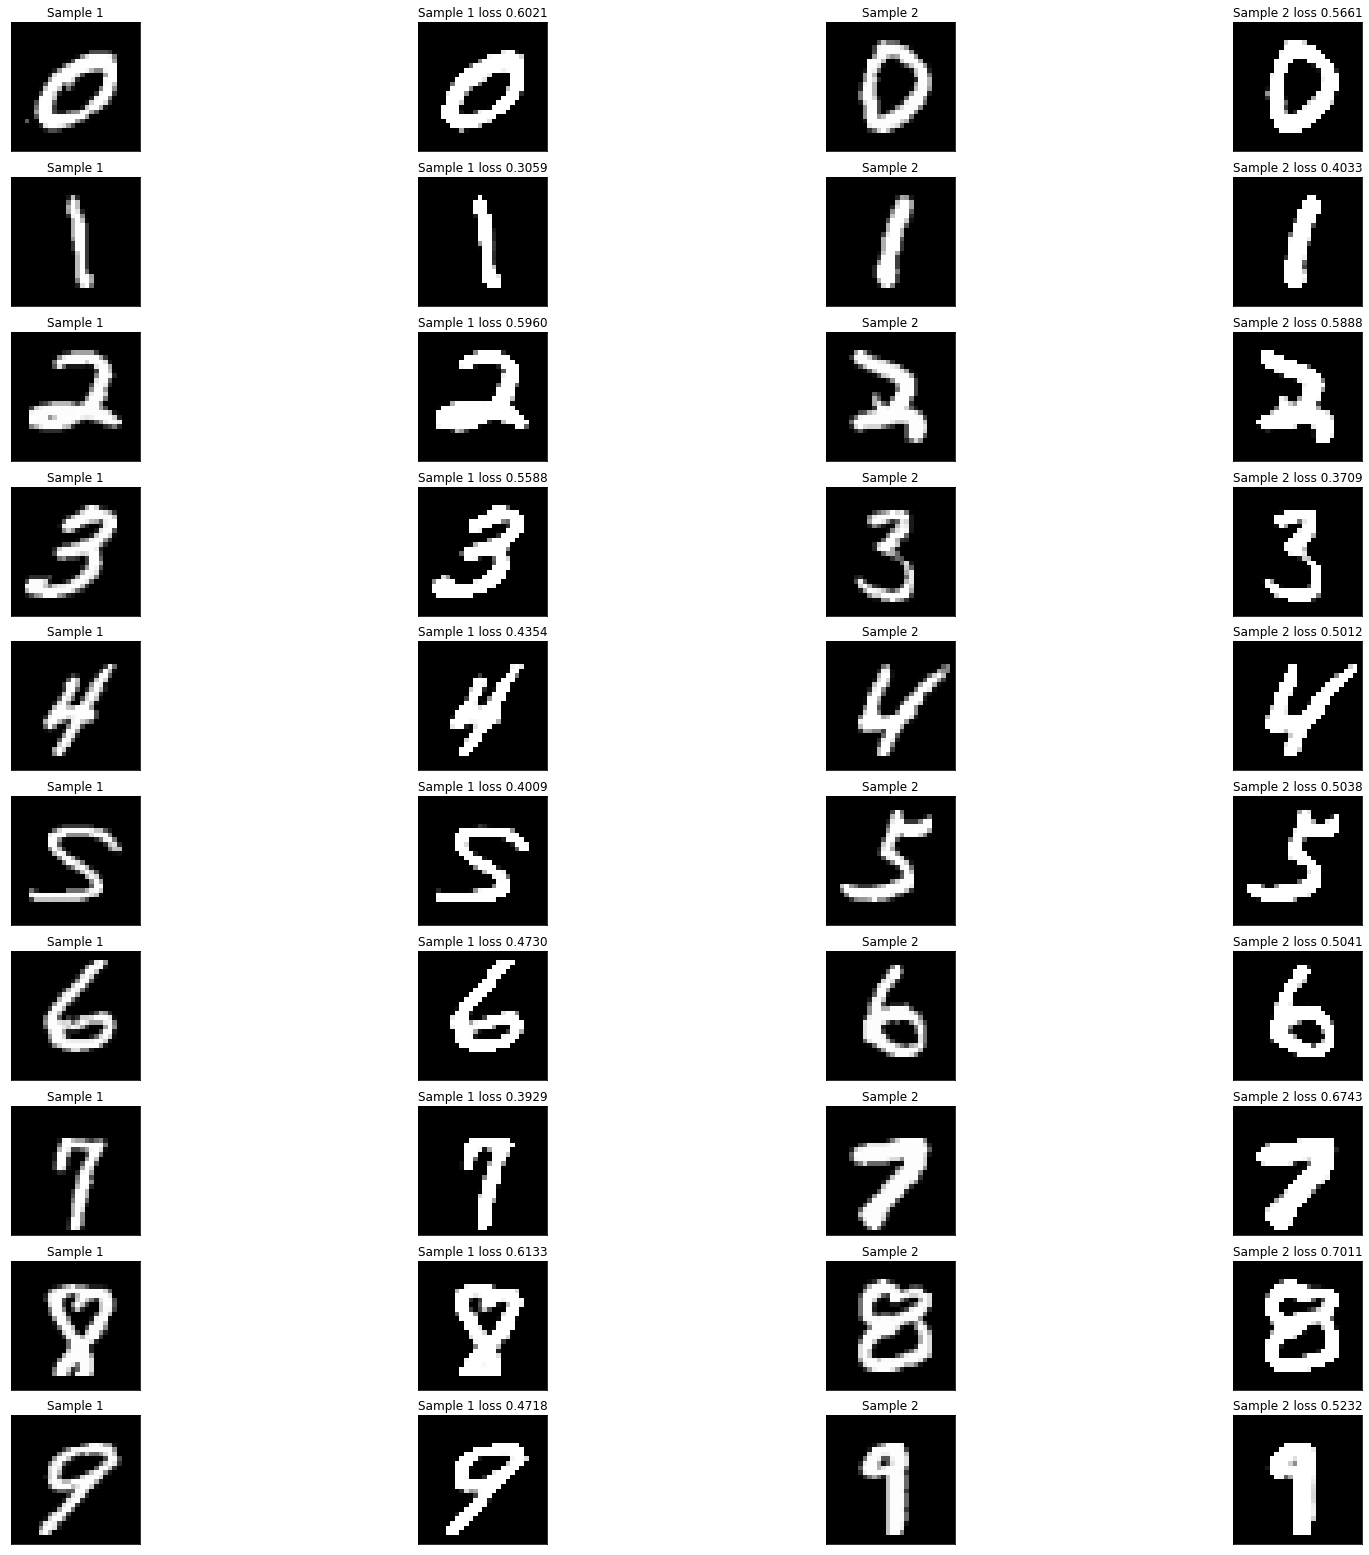

In [11]:
loss_conv, total_loss_conv = plot_reconstructions(model_conv, device, criterion, datadict=datadict)